In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/gouta/Downloads/SampleSuperstore.csv")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# 1. General info: columns, data types, nulls
df.info()

# 2. Shape: rows and columns
print("Shape of dataset:", df.shape)

# 3. Summary statistics for numerical columns
df.describe()

# 4. Column names
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
# 1. Check missing values
print(df.isnull().sum())

# 2. Remove duplicates
df = df.drop_duplicates()

# 3. Convert Order Date and Ship Date to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

# 4. Verify changes
df.info()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        99

In [7]:
# Overall sales and profit
print("Total Sales:", df["Sales"].sum())
print("Total Profit:", df["Profit"].sum())


Total Sales: 2297200.8603
Total Profit: 286397.0217


                       Sales       Profit
Category                                 
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008
Technology       836154.0330  145454.9481


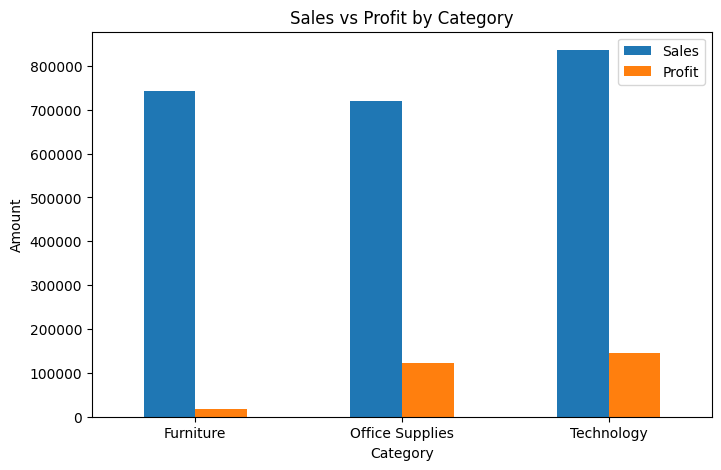

In [17]:
#Sales vs Profit by Category
category_summary = df.groupby("Category")[["Sales", "Profit"]].sum()
print(category_summary)

category_summary.plot(kind="bar", figsize=(8,5))
plt.title("Sales vs Profit by Category")
plt.ylabel("Amount")
plt.xticks(rotation=0) 
plt.savefig("Sales vs Profit by Category.png", dpi=300, bbox_inches="tight")
plt.show()


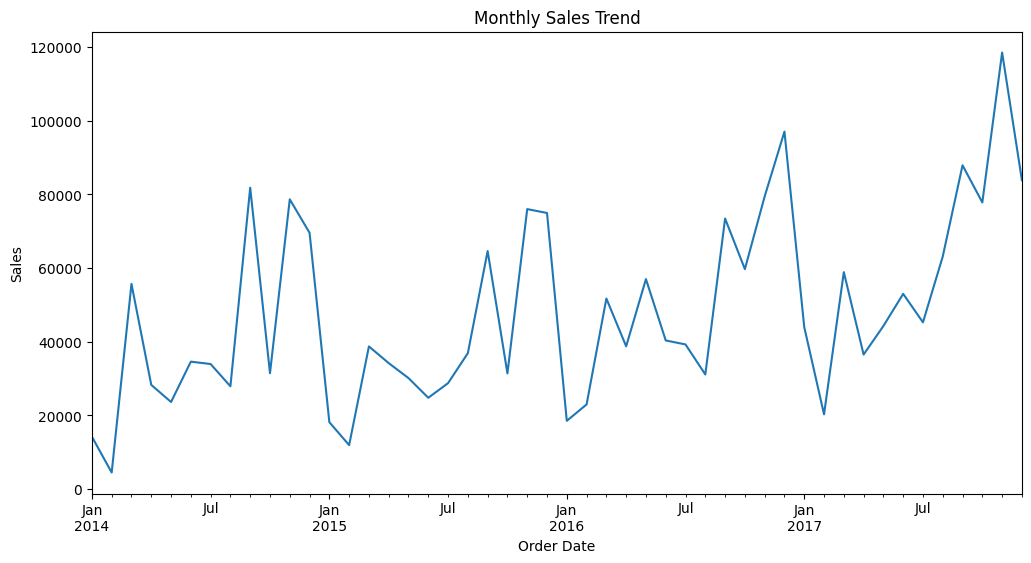

In [10]:
#Sales trend over time
monthly_sales = df.resample('ME', on='Order Date')["Sales"].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()


               Sales       Profit
Region                           
Central  501239.8908   39706.3625
East     678781.2400   91522.7800
South    391721.9050   46749.4303
West     725457.8245  108418.4489


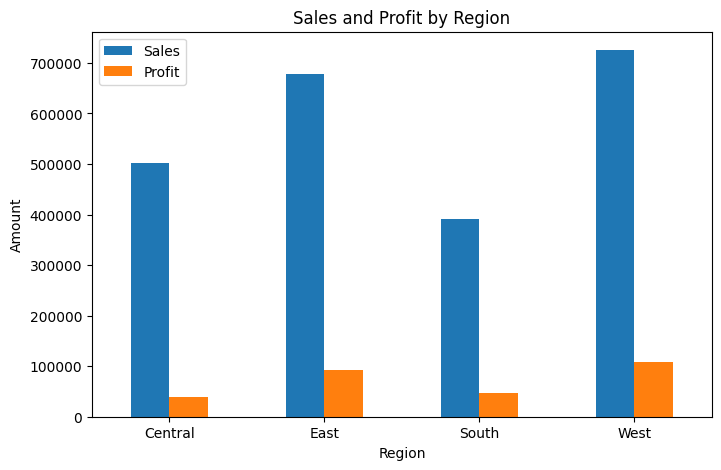

In [18]:
#Sales by Region
region_summary = df.groupby("Region")[["Sales","Profit"]].sum()
print(region_summary)

region_summary.plot(kind="bar", figsize=(8,5))
plt.title("Sales and Profit by Region")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.savefig("Sales and Profit by Region.png", dpi=300, bbox_inches="tight")
plt.show()


Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


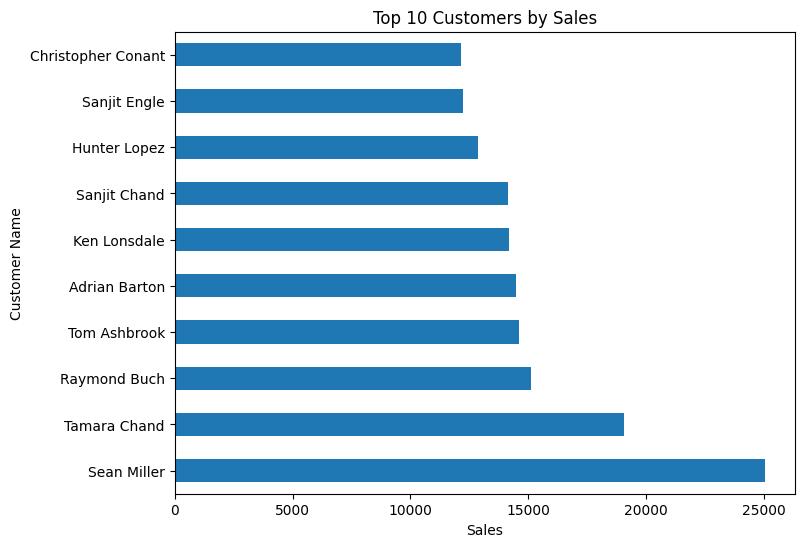

In [19]:
# Top 10 Customers by Sales
top_customers = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(10)
print(top_customers)

top_customers.plot(kind="barh", figsize=(8,6))  # horizontal bar chart
plt.title("Top 10 Customers by Sales")
plt.xlabel("Sales")
plt.savefig("Top 10 Customers by Sales.png", dpi=300, bbox_inches="tight")
plt.show()


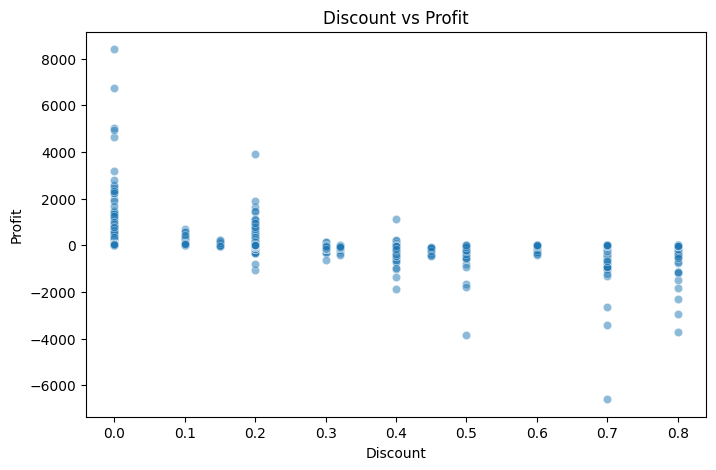

In [20]:
# Discount vs Profit
plt.figure(figsize=(8,5))
sns.scatterplot(x="Discount", y="Profit", data=df, alpha=0.5)
plt.title("Discount vs Profit")
plt.savefig("Discount vs Profit.png", dpi=300, bbox_inches="tight")
plt.show()


                                    Sales      Profit
Category        Sub-Category                         
Furniture       Bookcases     114879.9963  -3472.5560
                Chairs        328449.1030  26590.1663
                Furnishings    91705.1640  13059.1436
                Tables        206965.5320 -17725.4811
Office Supplies Appliances    107532.1610  18138.0054
                Art            27118.7920   6527.7870
                Binders       203412.7330  30221.7633
                Envelopes      16476.4020   6964.1767
                Fasteners       3024.2800    949.5182
                Labels         12486.3120   5546.2540
                Paper          78479.2060  34053.5693
                Storage       223843.6080  21278.8264
                Supplies       46673.5380  -1189.0995
Technology      Accessories   167380.3180  41936.6357
                Copiers       149528.0300  55617.8249
                Machines      189238.6310   3384.7569
                Phones      

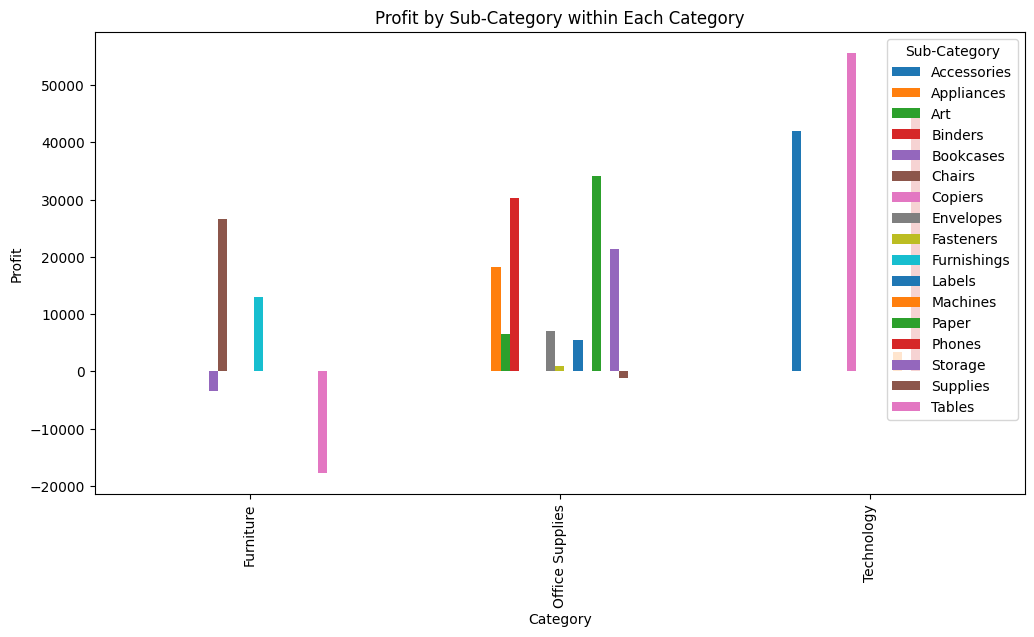

In [21]:
# Category vs Sub-Category
# Which sub-categories are the most profitable?
subcat_summary = df.groupby(["Category","Sub-Category"])[["Sales","Profit"]].sum()
print(subcat_summary)

subcat_summary["Profit"].unstack().plot(kind="bar", figsize=(12,6))
plt.title("Profit by Sub-Category within Each Category")
plt.ylabel("Profit")
plt.savefig("Profit by Sub-Category within Each Category.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
### 📊 Key Insights
1. Technology and Office Supplies are the most profitable categories.  
2. Furniture drives sales but suffers from low profit margins.  
3. The West region contributes the most to overall revenue and profit.  
4. Top 10 customers bring a significant share of sales → customer retention is crucial.  
5. High discounts often lead to losses; discount strategy must be reviewed.  
6. Sales and profit peak in Nov–Dec → plan inventory and marketing accordingly.  
7. Tables and Bookcases underperform → need price/discount adjustment.  

### ✅ Recommendations
- Focus marketing efforts on Technology and Office Supplies.  
- Revisit pricing/discount strategy for Furniture, especially Tables.  
- Build loyalty programs for top customers.  
- Prepare for seasonal demand spikes in year-end months.  
